In [1]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import load_model
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

from tensorflow.keras.layers import Dense, Activation, Dropout


tensorflow version 2.10.0
tensorflow version 2.10.0


In [2]:
def dataLoad():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
      


In [10]:
def test_models(model1, model2, x_test1, x_test2, y_test):
    
    pred1 = model1.predict(x_test1)
    pred2 = model2.predict(x_test2)

    plot_roc(pred1,y_test)
    plot_roc(pred2,y_test)


    score1 = metrics.accuracy_score(y_test, np.round(pred1))
    score2 = metrics.accuracy_score(y_test, np.round(pred2))
    print(f"Accuracy score 1: {score1}, accuracy score relu: {score2}")


    cm1 = confusion_matrix(y_test, np.round(pred1))
    np.set_printoptions(precision=2)
    print(cm1)

    cm2 = confusion_matrix(y_test, np.round(pred2))
    np.set_printoptions(precision=2)
    print(cm2) 

# Focus on VO

In [4]:
# Standardize,Convert to numpy - Classification
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled_noVO = trainScaler.fit_transform(x_train_sm.iloc[:,1:])
x_val_scaled_noVO = trainScaler.transform(x_val.iloc[:,1:])
x_test_scaled_noVO = trainScaler.transform(x_test.iloc[:,1:])

y_train = y_train_sm.values
y_val = y_val.values
y_test = y_test.values

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [5]:
len(x_train_scaled_noVO[0])

7

In [6]:
model_std_relu_dropout_noVO = Sequential()
model_std_relu_dropout_noVO.add(Dense(512, input_dim=7, activation='relu'))
model_std_relu_dropout_noVO.add(Dropout(0.5))
model_std_relu_dropout_noVO.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_noVO.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_noVO.fit(x_train_scaled_noVO,y_train,validation_data=(x_val_scaled_noVO,y_val),
        callbacks=[monitor],epochs=10)


2022-12-06 18:15:56.635651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 18:15:56.636220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/10


2022-12-06 18:15:57.024491: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 18:15:57.198772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2364

2022-12-06 18:47:33.165821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1941s 7ms/step - loss: 0.2364 - val_loss: 0.2087
Epoch 2/10
266255/266255 [==============================] - 1077s 4ms/step - loss: 0.2276 - val_loss: 0.1978
Epoch 3/10
266255/266255 [==============================] - 1046s 4ms/step - loss: 0.2252 - val_loss: 0.1983
Epoch 4/10
266255/266255 [==============================] - 1057s 4ms/step - loss: 0.2239 - val_loss: 0.2058
Epoch 5/10
266255/266255 [==============================] - 1064s 4ms/step - loss: 0.2230 - val_loss: 0.2036
Epoch 6/10
266255/266255 [==============================] - 1046s 4ms/step - loss: 0.2215 - val_loss: 0.2034
Epoch 7/10
266255/266255 [==============================] - 1055s 4ms/step - loss: 0.2197 - val_loss: 0.2225
Epoch 7: early stopping


In [7]:
# only VO

x_train_scaled_VO = trainScaler.fit_transform(np.array(x_train_sm.iloc[:,0]).reshape(-1, 1))
x_val_scaled_VO = trainScaler.transform(np.array(x_val.iloc[:,0]).reshape(-1, 1))
x_test_scaled_VO = trainScaler.transform(np.array(x_test.iloc[:,0]).reshape(-1, 1))

y_train = y_train_sm.values

In [8]:
model_std_relu_dropout_VO = Sequential()
model_std_relu_dropout_VO.add(Dense(32, input_dim=1, activation='relu'))
model_std_relu_dropout_VO.add(Dropout(0.5))
model_std_relu_dropout_VO.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_VO.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_VO.fit(x_train_scaled_VO,y_train,validation_data=(x_val_scaled_VO,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-12-06 20:34:03.048595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.5344

2022-12-06 20:50:44.325554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1046s 4ms/step - loss: 0.5344 - val_loss: 0.4791
Epoch 2/10
266255/266255 [==============================] - 1047s 4ms/step - loss: 0.5341 - val_loss: 0.4870
Epoch 3/10
266255/266255 [==============================] - 1044s 4ms/step - loss: 0.5341 - val_loss: 0.5043
Epoch 4/10
266255/266255 [==============================] - 1043s 4ms/step - loss: 0.5341 - val_loss: 0.5039
Epoch 5/10
266255/266255 [==============================] - 1056s 4ms/step - loss: 0.5340 - val_loss: 0.5100
Epoch 6/10
266255/266255 [==============================] - 1058s 4ms/step - loss: 0.5341 - val_loss: 0.4968
Epoch 6: early stopping


   77/16859 [..............................] - ETA: 22s   

2022-12-07 09:34:53.186726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  103/16859 [..............................] - ETA: 25s

2022-12-07 09:35:28.153873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 20s 1ms/step


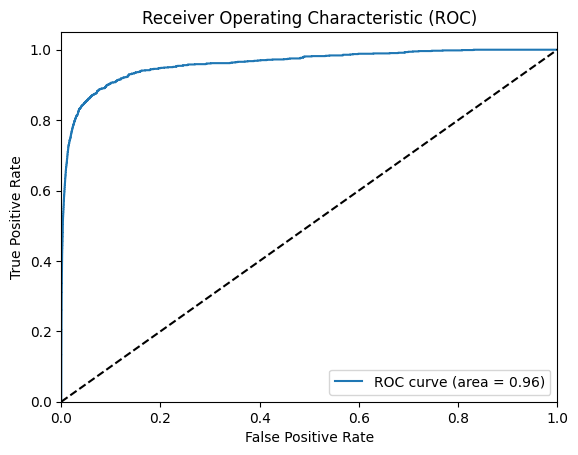

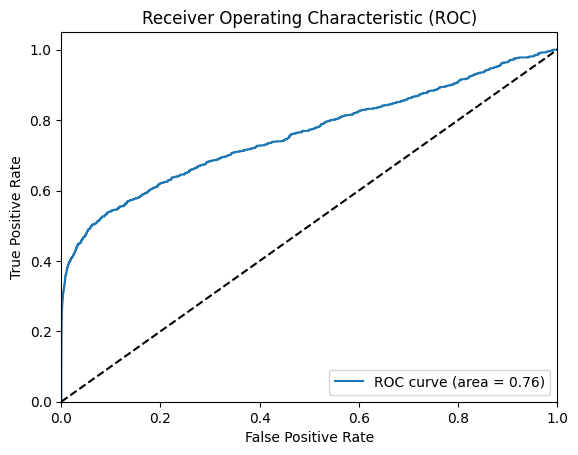

Accuracy score 1: 0.9223632821550843, accuracy score relu: 0.9165169874343589
[[496672  41766]
 [   118    931]]
[[493897  44541]
 [   497    552]]


In [11]:
test_models(model_std_relu_dropout_noVO, model_std_relu_dropout_VO, x_test_scaled_noVO, x_test_scaled_VO, y_test)
